## __Problem (VII):__

### Proof:
$$
\text{Given the polytropic equation of state:} \quad P = K \rho^{5/3}
$$

$$
\text{And the hydrostatic equilibrium equation:} \quad \frac{dP}{dz} = - \frac{GM}{R^2} \rho
$$

#### Step 1: Express Density in Terms of Pressure

Using the polytropic relation:

$$
\rho = \left(\frac{P}{K} \right)^{3/5}
$$

Substituting into hydrostatic equilibrium:

$$
\frac{dP}{dz} = - \frac{GM}{R^2} \left(\frac{P}{K} \right)^{3/5}
$$

#### Step 2: Separate Variables and Integrate

Rearrange:

$$
P^{-3/5} dP = - \frac{GM}{R^2} K^{-3/5} dz
$$

Integrate both sides:

$$
\int P^{-3/5} dP = - \frac{GM}{R^2} K^{-3/5} \int dz
$$

Solving the left integral:

$$
\frac{P^{2/5}}{2/5} = - \frac{GM}{R^2} K^{-3/5} z + C
$$

#### Step 3: Apply Boundary Condition

At $ z = 0 $, $ P = P_0 $:

$$
\frac{P_0^{2/5}}{2/5} = C
$$

Thus:

$$
\frac{P^{2/5}}{2/5} = \frac{P_0^{2/5}}{2/5} - \frac{GM}{R^2} K^{-3/5} z
$$

Rearrange:

$$
P^{2/5} = P_0^{2/5} - \frac{2}{5} \frac{GM}{R^2} K^{-3/5} z
$$

#### Step 4: Find $ z_{\text{max}} $

At $ z = z_{\text{max}} $, pressure vanishes:

$$
0 = P_0^{2/5} - \frac{2}{5} \frac{GM}{R^2} K^{-3/5} z_{\text{max}}
$$

Solving for $ z_{\text{max}} $:

$$
z_{\text{max}} = \frac{5}{2} \frac{P_0^{2/5}}{\frac{GM}{R^2} K^{-3/5}}
$$

Rewriting:

$$
z_{\text{max}} = \frac{5}{2} \frac{P_0^{2/5} R^2}{GM} K^{-3/5}
$$

This gives the maximum altitude where the atmospheric pressure reaches zero, incorporating the gravitational acceleration $ g = \frac{GM}{R^2} $.


### Polytropic Constant Estimation

A polytrope with index $ n = 1.5 $ is a good model for fully convective star cores (like those of red giants), brown dwarfs, and giant gaseous planets (like Jupiter). With this index, the polytropic exponent is $ \frac{5}{3} $, which is the heat capacity ratio ($ \gamma $) for monatomic gas. 

For the interior of gaseous stars (consisting of either ionized hydrogen or helium), this follows from an ideal gas approximation for natural convection conditions.

Now for $ K $ constant estimation:


### Derivation of Polytropic Constant $ K $

We start with the **polytropic equation of state**:

$$
P = K \rho^{\gamma}
$$

where $ \gamma = 1 + \frac{1}{n} $ is the polytropic exponent.

#### Step 1: Hydrostatic Equilibrium
The equation of hydrostatic equilibrium is:

$$
\frac{dP}{dr} = -\frac{GM(r) \rho}{r^2}
$$

For a polytropic atmosphere, the density can be expressed as:

$$
\rho = \left(\frac{P}{K}\right)^{\frac{1}{\gamma}}
$$

Substituting into the hydrostatic equilibrium equation:

$$
\frac{dP}{dr} = -\frac{GM(r)}{r^2} \left(\frac{P}{K}\right)^{\frac{1}{\gamma}}
$$

#### Step 2: Approximate the Hydrostatic Condition
For an order-of-magnitude estimate, assume that near the surface, $ M(r) \approx M $, and pressure decreases over the characteristic scale $ R $:

$$
\frac{P_0}{R} \approx \frac{GM}{R^2} \left(\frac{P_0}{K}\right)^{\frac{1}{\gamma}}
$$

Rearrange for $ K $:

$$
K \approx P_0 \left(\frac{R^3}{GM}\right)^{\gamma - 1}
$$

Since $ \gamma = 1 + \frac{1}{n} $, then $ \gamma - 1 = \frac{1}{n} $, so we get:

$$
K \approx P_0 \left(\frac{R^3}{GM}\right)^{1/n}
$$

Rewriting in terms of Jupiter’s properties:

$$
K = \frac{P_0 R^{3/n}}{\left(\frac{GM}{R^2}\right)^{n+1}}
$$

Thus, the derived formula holds for Jupiter's polytropic atmosphere.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Constants for Jupiter
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 1.898e27  # Mass of Jupiter (kg)
R = 6.9911e7  # Radius of Jupiter (m)
P0 = 1e5  # Approximate surface pressure (Pa)

# Polytropic index for giant planets
n = 1.5  # For a fully convective body like Jupiter

# Calculate polytropic constant K
K = (P0 * R**(3/n)) / (G * M / R**2)**(n+1)

display(Math(r"\text{Polytropic constant } K \text{ for Jupiter: } " + "{:.3e}".format(K) + r" \text{ J} \cdot \text{m}^3 \cdot \text{kg}^{-5/3}"))

<IPython.core.display.Math object>

In [6]:
# Define gravitational acceleration
g = G * M / R**2

# Define max height
z_max = (5/2) * (P0**(2/5)) / (g * K**(-3/5))

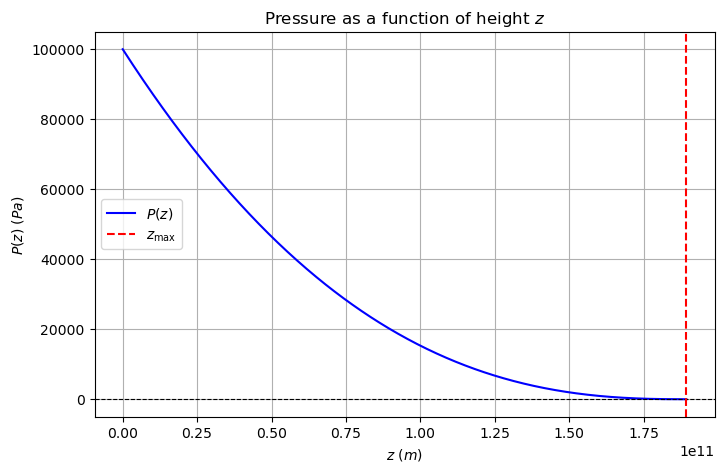

In [7]:
# Define height range
z = np.linspace(0, z_max, 1000)

# Compute P(z) ensuring no negative values inside power
P_arg = P0**(2/5) - (2/5) * g * K**(-3/5) * z
# Prevent negative values before exponentiation
P_arg[P_arg < 0] = 0  
P = P_arg ** (5/2)

# Plot the solution
plt.figure(figsize=(8, 5))
plt.plot(z, P, label=r"$P(z)$", color="blue")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(z_max, color="red", linestyle="--", label=r"$z_{\max}$")
plt.xlabel(r"$z$ $(m)$")
plt.ylabel(r"$P(z)$ $(Pa)$")
plt.title("Pressure as a function of height $z$")
plt.legend()
plt.grid(True)
plt.show()

---
## Refrences:
[1] A. W. Hendry, “A polytropic model of the Sun,” *American Journal of Physics*, vol. 61, no. 10, pp. 906–910, Oct. 1993, doi: [10.1119/1.17362](https://doi.org/10.1119/1.17362).

[2] Williams, David R. (December 23, 2021). "Jupiter Fact Sheet". *NASA*. Archived from the original on December 29, 2019. Retrieved October 13, 2017.

[3] Wikipedia Contributors, “Polytrope,” *Wikipedia*, Sep. 06, 2024. https://en.wikipedia.org/wiki/Polytrope